**Image Segmenation**

In [11]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Reading from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
os.listdir('/content/drive/My Drive/TeaLeavesManuallyCropped')

['BestQ', 'BelowBestQ', 'PoorQ', 'Cant tell']

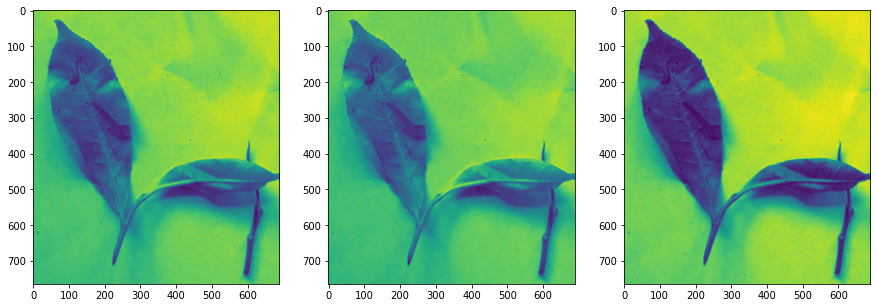

In [14]:
# trying different color channels

image = cv2.imread('/content/drive/My Drive/TeaLeavesManuallyCropped/BestQ/B008.jpg')
#img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# RGB channel
R = img_rgb[:,:,0]
G = img_rgb[:,:,1]
B = img_rgb[:,:,2]
fig, ax = plt.subplots(1,3, figsize=(15,15))
ax[0].imshow(R)
ax[1].imshow(G)
ax[2].imshow(B)

In [15]:
# Chossing b channel
# https://docs.opencv.org/4.5.2/d1/d5c/tutorial_py_kmeans_opencv.html
pixel_vals = B.flatten()
pixel_vals = np.float32(pixel_vals)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0 )

# Choosing only 2 clusters one for the actual leaf pixels and second for the background
K = 2
retval, labels, centers = cv2.kmeans(pixel_vals, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)

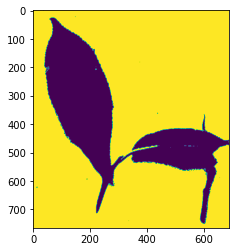

In [16]:
# Segmenation
segmented_data = centers[labels.flatten()]
segmented_image = segmented_data.reshape((B.shape))
pixel_labels = labels.reshape(img_rgb.shape[0], img_rgb.shape[1])

# displaying segmented image
plt.imshow(segmented_image)

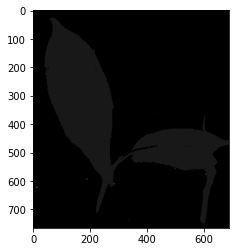

In [17]:
# if any connected components between the background and leaf, it can be removed by using below code

# Doing this, some unwanted pixels that are clustered in main cluster can be avoided.
# Ref - https://docs.opencv.org/3.4/d3/dc0/group__imgproc__shape.html#gac2718a64ade63475425558aa669a943a

pixel_labels = np.uint8(pixel_labels)
ret, components = cv2.connectedComponents(pixel_labels, connectivity=8)
plt.imshow(components, cmap='gray')

# looks like there are no connencted components, the reason why we are getting a black color

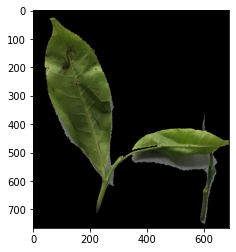

In [18]:
#  to extract only the foreground cluster
indices = []
for i in range(1,ret):
  row, col = np.where(components == i)
  indices.append(max(len(row), len(col)))

component = np.argmax(np.array(indices))
main_component = component+1 

# create a mask to extract pixels corresponding to cluster to which leaf belongs
mask = np.where(components==main_component, 1, 0)
B = image[:,:,0]
G = image[:,:,1]
R = image[:,:,2]

# extract only masked pixels
r = R*mask
g = G*mask
b = B*mask

final_img = np.dstack((r,g,b))
plt.imshow(final_img)
